In [2]:
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from qgis.core import *
from qgis.PyQt.QtGui import *
from qgis.PyQt.QtCore import *
from IPython.display import Image
from qgis.gui import *
from qgis import processing

In [3]:
QgsApplication.setPrefixPath(r'C:\\OSGeo4W64\\apps\\qgis', True)
qgs = QgsApplication([], True)
qgs.initQgis()
sys.path.append(r'C:\OSGeo4W64\apps\qgis\python\plugins')
project = QgsProject.instance()

print(QgsApplication.showSettings())

Application state:
QGIS_PREFIX_PATH env var:		C:/OSGEO4~1/apps/qgis
Prefix:		C:/OSGEO4~1/apps/qgis
Plugin Path:		C:/OSGEO4~1/apps/qgis/plugins
Package Data Path:	C:/OSGEO4~1/apps/qgis/.
Active Theme Name:	
Active Theme Path:	C:/OSGEO4~1/apps/qgis/./resources/themes\\icons/
Default Theme Path:	:/images/themes/default/
SVG Search Paths:	C:\\OSGeo4W64\\apps\\qgis/./svg/
		C:/OSGEO4~1/apps/qgis/./svg/
		C:/Users/ASUS/AppData/Roaming/python3\profiles\default/svg/
User DB Path:	C:/OSGEO4~1/apps/qgis/./resources/qgis.db
Auth DB Path:	C:/Users/ASUS/AppData/Roaming/python3\profiles\default/qgis-auth.db



In [4]:
path= r"C:\Users\ASUS\Desktop\Trabalho_SIG\US\states_21basic\states.shp"
map_layer = QgsVectorLayer(path, 'mapa_us', 'ogr')

if not map_layer.isValid():
    print("Failed to load the layer!")
else:
    project.addMapLayer(map_layer)
    print("Sucess")

Sucess


In [5]:
csv_path = r"file:///C:\Users\ASUS\Desktop\Trabalho_SIG\US\us-states.csv?delimiter=,'"

csv_layer = QgsVectorLayer(csv_path, 'Data', 'delimitedtext')

if not csv_layer.isValid():
    print('Layer failed to load!')
else:
    project.addMapLayer(csv_layer)
    print("Sucess")

Sucess


In [6]:
QgsProject.instance().addMapLayer(map_layer)
QgsProject.instance().addMapLayer(csv_layer)
csv_iso='state'
shp_iso='STATE_NAME'

joinObject=QgsVectorLayerJoinInfo()
joinObject.setJoinFieldName(csv_iso)
joinObject.setTargetFieldName(shp_iso)
joinObject.setJoinLayerId(csv_layer.id())
joinObject.setUsingMemoryCache(False)
joinObject.setJoinLayer(csv_layer)
map_layer.addJoin(joinObject)

vlayer = QgsProject.instance().mapLayersByName('mapa_us')[0]

# Checking if all columns were uploaded
for field in vlayer.fields():
    print("Column "+field.name()+" Load")

Column STATE_NAME Load
Column DRAWSEQ Load
Column STATE_FIPS Load
Column SUB_REGION Load
Column STATE_ABBR Load
Column Data_date Load
Column Data_fips Load
Column Data_cases Load
Column Data_deaths Load


In [7]:
from qgis.utils import iface


label_settings = QgsPalLayerSettings()
label_settings.drawBackground = True
label_settings.fieldName = "Data_cases"

text_format = QgsTextFormat()
background_color = QgsTextBackgroundSettings()

background_color.setEnabled(False)
text_format.setBackground(background_color )
label_settings.setFormat(text_format)

vlayer.setLabeling(QgsVectorLayerSimpleLabeling(label_settings))
vlayer.setLabelsEnabled(True)
vlayer.triggerRepaint()

52.48444904887995
Gerar mapa com 1000 por 1000


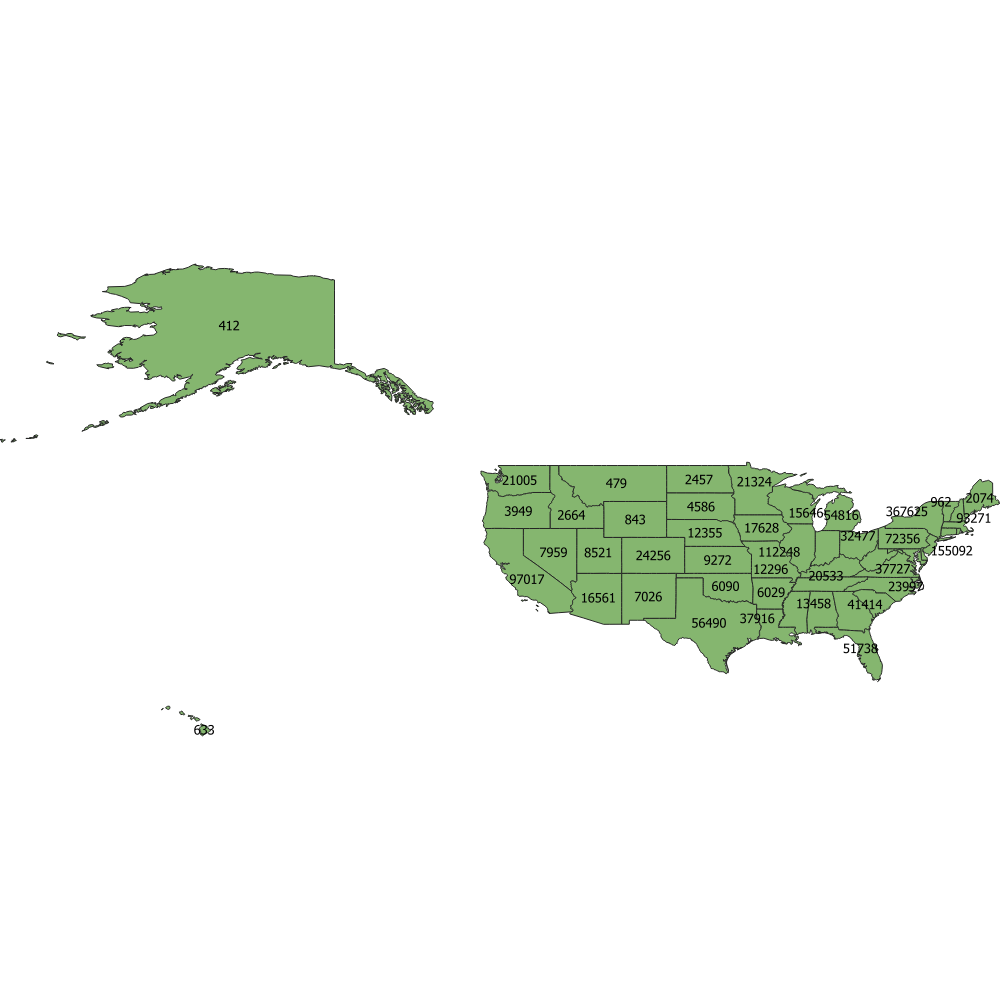

In [8]:
vlayer = QgsProject.instance().mapLayersByName('mapa_us')[0]
xt = vlayer.extent()

print(xt.height())
width  = 1000
height = 1000
print("Gerar mapa com {} por {}".format(width, height))

options = QgsMapSettings()
options.setLayers([vlayer])
options.setBackgroundColor(QColor(255, 255, 255))

options.setOutputSize(QSize(width, height))
options.setExtent(xt)
           
render = QgsMapRendererParallelJob(options)
render.start()
render.waitForFinished()

image = render.renderedImage()
imgbuf= QBuffer()
imgbuf.open( QIODevice.ReadWrite )
image.save( imgbuf,"PNG" )
Image( imgbuf.data() )

In [9]:
from qgis.utils import iface


label_settings = QgsPalLayerSettings()
label_settings.drawBackground = True
label_settings.fieldName = "STATE_NAME"

text_format = QgsTextFormat()
background_color = QgsTextBackgroundSettings()

background_color.setEnabled(False)
text_format.setBackground(background_color )
label_settings.setFormat(text_format)

vlayer.setLabeling(QgsVectorLayerSimpleLabeling(label_settings))
vlayer.setLabelsEnabled(True)
vlayer.triggerRepaint()

52.48444904887995
Gerar mapa com 1000 por 1000


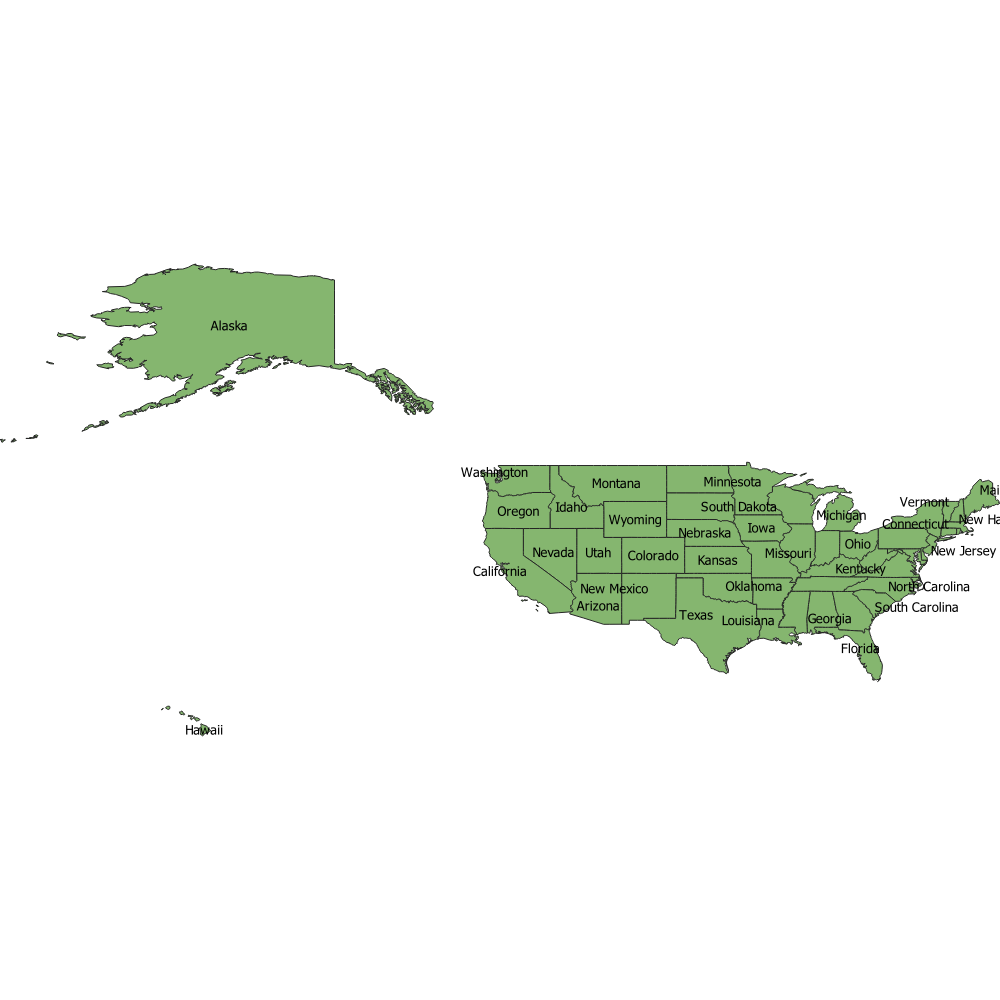

In [11]:
vlayer = QgsProject.instance().mapLayersByName('mapa_us')[0]
xt = vlayer.extent()

print(xt.height())
width  = 1000
height = 1000
print("Gerar mapa com {} por {}".format(width, height))

options = QgsMapSettings()
options.setLayers([vlayer])
options.setBackgroundColor(QColor(255, 255, 255))

options.setOutputSize(QSize(width, height))
options.setExtent(xt)
           
render = QgsMapRendererParallelJob(options)
render.start()
render.waitForFinished()

image = render.renderedImage()
imgbuf= QBuffer()
imgbuf.open( QIODevice.ReadWrite )
image.save( imgbuf,"PNG" )
Image( imgbuf.data() )

In [12]:
from qgis.PyQt import QtGui

myVectorLayer = QgsProject.instance().mapLayersByName('mapa_us')[0]

myTargetField = 'Data_cases'
myRangeList = []
myOpacity = 1
# Make our first symbol and range...
myMin = 0
myMax = 121
myLabel = 'Group 1: 0 - 121'
myColour = QtGui.QColor('#e6e6ff')
mySymbol1 = QgsSymbol.defaultSymbol(myVectorLayer.geometryType())
mySymbol1.setColor(myColour)
mySymbol1.setOpacity(myOpacity)
myRange1 = QgsRendererRange(myMin, myMax, mySymbol1, myLabel)
myRangeList.append(myRange1)

#now make another symbol and range...
myMin = 121
myMax = 622
myLabel = 'Group 2: 121 - 622'
myColour = QtGui.QColor('#ff6666')
mySymbol2 = QgsSymbol.defaultSymbol(
     myVectorLayer.geometryType())
mySymbol2.setColor(myColour)
mySymbol2.setOpacity(myOpacity)
myRange2 = QgsRendererRange(myMin, myMax, mySymbol2, myLabel)
myRangeList.append(myRange2)

#and another
myMin = 622
myMax = 2479
myLabel = 'Group 3: 622 - 2479'
myColour = QtGui.QColor('#ff3333')
mySymbol3 = QgsSymbol.defaultSymbol(
     myVectorLayer.geometryType())
mySymbol3.setColor(myColour)
mySymbol3.setOpacity(myOpacity)
myRange3 = QgsRendererRange(myMin, myMax, mySymbol3, myLabel)
myRangeList.append(myRange3)

#and another
myMin = 2479
myMax = 25501
myLabel = 'Group 4: 2479 - 25501'
myColour = QtGui.QColor('#cc0000')
mySymbol4 = QgsSymbol.defaultSymbol(
     myVectorLayer.geometryType())
mySymbol4.setColor(myColour)
mySymbol4.setOpacity(myOpacity)
myRange4 = QgsRendererRange(myMin, myMax, mySymbol4, myLabel)
myRangeList.append(myRange4)

#and another
myMin = 25501
myMax = 45495
myLabel = 'Group 5: 25501 - 45495'
myColour = QtGui.QColor('#660000')
mySymbol5 = QgsSymbol.defaultSymbol(
     myVectorLayer.geometryType())
mySymbol5.setColor(myColour)
mySymbol5.setOpacity(myOpacity)
myRange5 = QgsRendererRange(myMin, myMax, mySymbol5, myLabel)
myRangeList.append(myRange5)

myRenderer = QgsGraduatedSymbolRenderer('', myRangeList)
myClassificationMethod = QgsApplication.classificationMethodRegistry().method("EqualInterval")
myRenderer.setClassificationMethod(myClassificationMethod)
myRenderer.setClassAttribute(myTargetField)

myVectorLayer.setRenderer(myRenderer)

In [14]:
xt = vlayer.extent()
# print(xt)
width  = 1000
height = 1000
print("Gerar mapa com {} por {}".format(width, height))


project = QgsProject().instance()
project.addMapLayers([myVectorLayer])
manager = project.layoutManager()
layoutName = 'Cases_US'
layouts_list = manager.printLayouts()
for layout in layouts_list:
    if layout.name() == layoutName:
        manager.removeLayout(layout)
        
layout = QgsPrintLayout(project)
layout.initializeDefaults()
layout.setName(layoutName)
manager.addLayout(layout)

pc = layout.pageCollection()
pc.page(0).attemptResize(QgsLayoutSize(width,height,QgsUnitTypes.LayoutMillimeters))


map = QgsLayoutItemMap(layout)
map.setRect(20,20,20,20)
map.setLayers([myVectorLayer])



ms = QgsMapSettings()
ms.setLayers([myVectorLayer])
ms.setExtent(xt)
map.setExtent(xt)

layout.addLayoutItem(map)



map.attemptMove(QgsLayoutPoint(0,0,QgsUnitTypes.LayoutMillimeters))
map.attemptResize(QgsLayoutSize(width,height,QgsUnitTypes.LayoutMillimeters))


map.setBackgroundColor(QColor(250,250,250))




legend = QgsLayoutItemLegend(layout)

legend.setReferencePoint(6)
legend.setScale(3)
legend.attemptMove(QgsLayoutPoint(0,height,QgsUnitTypes.LayoutMillimeters))

layout.addLayoutItem(legend)
legend.setLegendFilterByMapEnabled(True)

legend.setLinkedMap(map)

exporter = QgsLayoutExporter(manager.layoutByName("Cases_US"))

#Se fizer render apenas uma vez o reference point continua a ser top left e não bottom left
image = exporter.renderPageToImage(0)
image = exporter.renderPageToImage(0)

from IPython.display import Image
imgbuf= QBuffer()
imgbuf.open( QIODevice.ReadWrite )
image.save( imgbuf,"PNG" )
Image( imgbuf.data() )

Gerar mapa com 1000 por 1000
